# CS 1656 – Introduction to Data Science (Fall 2019) 

## Instructor: Alexandros Labrinidis / Teaching Assistant: Xiaoting Li

## Term Project 

**Released: November 20, 2019**

**Due: December 10, 2019**

In [8]:
# Your name: Eric Hunzeker
# Your github ID: erichunzeker
# Your pitt username: emh128

### Goal
The goal of this project is to expose you with a real data science problem, looking at the end-to-end pipeline. 

### What to do 
You are asked to write a Python Jupyter notebook, called `bikeviz.ipynb` that will:
* [Task 1] access historical bike rental data for 2019 from HealthyRidePGH and summarize the rental data  
* [Task 2] create graphs to show the popularity of the different rental stations, given filter conditions  
* [Task 3] create graphs to show the rebalancing issue  
* [Task 4] cluster the data to group similar stations together, using a variety of clustering functions and visualize the results of the clustering.  

### Jupyter Notebook Rules
This skeleton is provided for you to complete the project. Please add your code in the code cells below each Task. Feel free to add cells as needed. Do not remove existing cells.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import glob

# Feel free to add here any other libraries as specified in the project description

For the sake of interactive display in Jupyter, we will enable matplotlib inline.

In [2]:
%matplotlib inline

### [Task 0] Warming Up
Task 0 is for testing. It is used to ensure that this Jupyter Notebook skeleton works on both your machines and our machine. Please run the following code to see if you can see a line plot. The line plot is the basic plot that we have seen in Recitation2. 

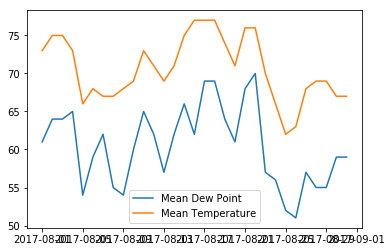

In [3]:
import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
df = pd.read_csv('http://data.cs1656.org/KPIT_Aug17.csv',\
                       sep=',', engine='python', parse_dates=['EST'])
p1 = plt.plot(df['EST'],df['MeanDew PointF'])
p2 = plt.plot(df['EST'],df['Mean TemperatureF'])
plt.legend([p1[0],p2[0]], ['Mean Dew Point', 'Mean Temperature'])

plt.show()

--- 
Add your code below this line

---
### Task 1

In this task you will need to access historical bike rental data for 2019 from HealthyRidePGH and summarize the rental data.

### Task 1.1

In [12]:
data = pd.concat([pd.read_csv(f) for f in glob.glob('HealthyRideRentals2019-*.csv')], ignore_index = True)

# station id | date (individual day) | fromCNT | toCNT | rebalCNT 

def getDate(x):
    x = x.split()
    date = pd.Timestamp(x[0])
    return date.date()

data['From Date'] = data['Starttime'].apply(getDate)
data['To Date'] = data['Stoptime'].apply(getDate)

data_small = data[['From Date','From station id', 'Trip id', 'Bikeid', 'To station id', 'To Date']].copy()

from_data = data_small[['From Date','From station id']].copy()
from_data = from_data.copy()
to_data = data_small[['To Date', 'To station id']].copy()
to_data = to_data.copy()


from_data['Direction'] = 'From'
from_data.columns = ['Date','Station ID', 'Direction']

to_data['Direction'] = 'To'
to_data.columns = ['Date','Station ID', 'Direction']


seperated = from_data.append(to_data, ignore_index = True)

seperated = seperated.sort_values('Station ID')


cross = pd.crosstab(seperated["Date"], [seperated["Station ID"], seperated['Direction']],dropna=False, margins=False, colnames=['Station ID', 'Metric'])
cross = cross.sort_values('Date')
cross.head(202)


# data['To Date'] = data['Stoptime'].apply(getDate)
# data = data.sort_values(by=['From Date', 'From station id'])
# data = data.groupby(['From Date', 'From station id'], as_index=True).count()
# data.head()


# day_summary = data[['From station id','Date', '']]
# day_summary.head()


Station ID 666.0      1000.0      1001.0      1002.0     1003.0       ...  \
Metric        From To    From  To    From  To    From To    From  To  ...   
Date                                                                  ...   
2019-01-01       0  0       4   4       0   0       1  1       0   0  ...   
2019-01-02       0  0       2   0       1   4       0  0       0   0  ...   
2019-01-03       0  0       0   3       4  10       1  0       2   1  ...   
2019-01-04       0  0       2   1       2   4       0  0       0   0  ...   
2019-01-05       0  0       5   5       5   2       3  3       0   0  ...   
...            ... ..     ...  ..     ...  ..     ... ..     ...  ..  ...   
2019-07-17       0  0       5   7      13  10       3  3       5   4  ...   
2019-07-18       0  0      20  16      17  24       4  4       6  12  ...   
2019-07-19       0  0      11  17      19  37       5  3       5   3  ...   
2019-07-20       1  0      17  18      17  16       1  1       1   1  ...   
2019-07-21       0  0      15  19       7  15       0  3       5   4  ...   

Station ID 49801.0    49881.0    49921.0    49951.0    90097.0     
Metric        From To    From To    From To    From To    From To  
Date                                                               
2019-01-01       0  0       0  0       0  0       0  0       0  0  
2019-01-02       0  0       0  0       0  0       1  0       0  0  
2019-01-03       0  0       0  0       0  0       0  0       0  0  
2019-01-04       0  0       0  0       0  0       0  1       0  0  
2019-01-05       0  0       0  0       0  0       0  0       0  0  
...            ... ..     ... ..     ... ..     ... ..     ... ..  
2019-07-17       0  0       3  3       2  2       0  0       0  0  
2019-07-18       0  0       4  6       3  7       0  0       0  0  
2019-07-19       0  0       3  2       4  2       1  2       0  0  
2019-07-20       0  0       3  0       0  0       6  7       0  0  
2019-07-21       0  0       0  0       4  3       1  0       0  0  

[202 rows x 238 columns]

### Task 1.2

---
### Task 2

In this task you will need to create graphs to show the popularity of the different rental stations, given filter conditions.

In [ ]:
# FILTER VARIABLES -- feel free to edit the values, but the names of the variables must remain 
#                     as they are and should be used by your code accordingly from this point on

filter_month = 4
filter_stationID = 1046


### Task 2.1

### Task 2.2

### Task 2.3

---
### Task 3

In this task you will create graphs to show the rebalancing issue.

### Task 3.1

### Task 3.2

---
### Task 4

In this task you will cluster the data to group similar stations together, using a variety of clustering functions and visualize the results of the clustering.

### Task 4.1

### Task 4.2

### Task 4.3